# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("synthetic_beverage_sales_data.csv")
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53.0,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90.0,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73.0,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59.0,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35.0,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

Jumlah Baris: 5383631
Jumlah Kolom: 11


In [4]:
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383631 entries, 0 to 5383630
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       float64
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(4), object(7)
memory usage: 451.8+ MB
None


In [5]:
print("\nContoh Data:")
df.head()


Contoh Data:


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53.0,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90.0,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73.0,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59.0,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35.0,0.10,27.40,Baden-Württemberg,2023-08-23


In [6]:
df = df.sample(n=100000, random_state=69, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       100000 non-null  object 
 1   Customer_ID    100000 non-null  object 
 2   Customer_Type  100000 non-null  object 
 3   Product        100000 non-null  object 
 4   Category       100000 non-null  object 
 5   Unit_Price     100000 non-null  float64
 6   Quantity       100000 non-null  float64
 7   Discount       100000 non-null  float64
 8   Total_Price    100000 non-null  float64
 9   Region         100000 non-null  object 
 10  Order_Date     100000 non-null  object 
dtypes: float64(4), object(7)
memory usage: 8.4+ MB


In [7]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Jumlah Missing': missing_values, 'Persentase (%)': missing_percentage})

print("Data yang Hilang:")
print(missing_data)

Data yang Hilang:
Empty DataFrame
Columns: [Jumlah Missing, Persentase (%)]
Index: []


In [8]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.833777,23.213170,0.029896,129.252355
std,14.734623,26.954493,0.044946,496.512365
min,0.320000,1.000000,0.000000,0.330000
25%,1.050000,6.000000,0.000000,8.380000
50%,1.750000,11.000000,0.000000,21.200000
75%,3.210000,31.000000,0.050000,70.400000
max,142.530000,100.000000,0.150000,12442.870000


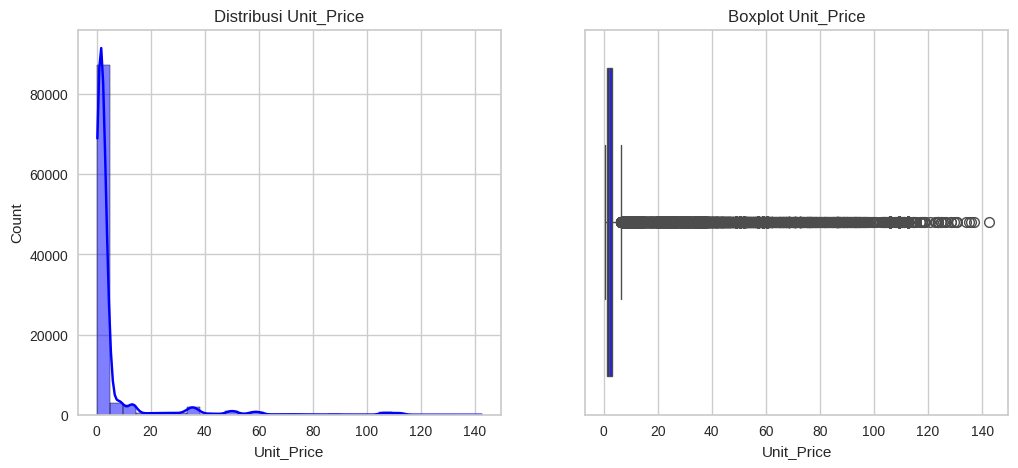

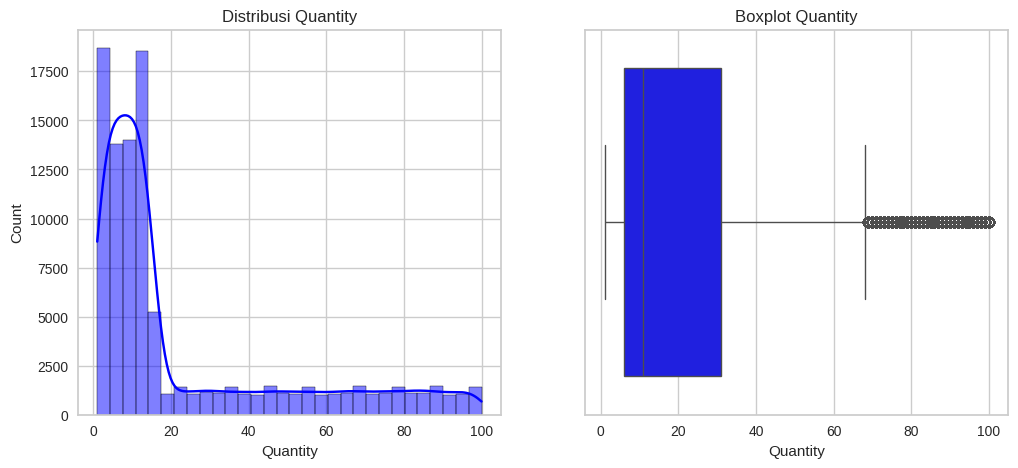

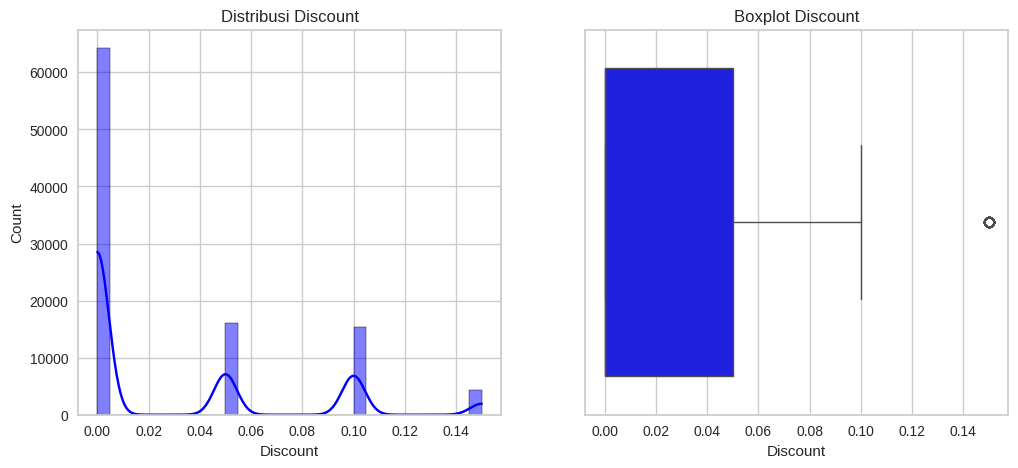

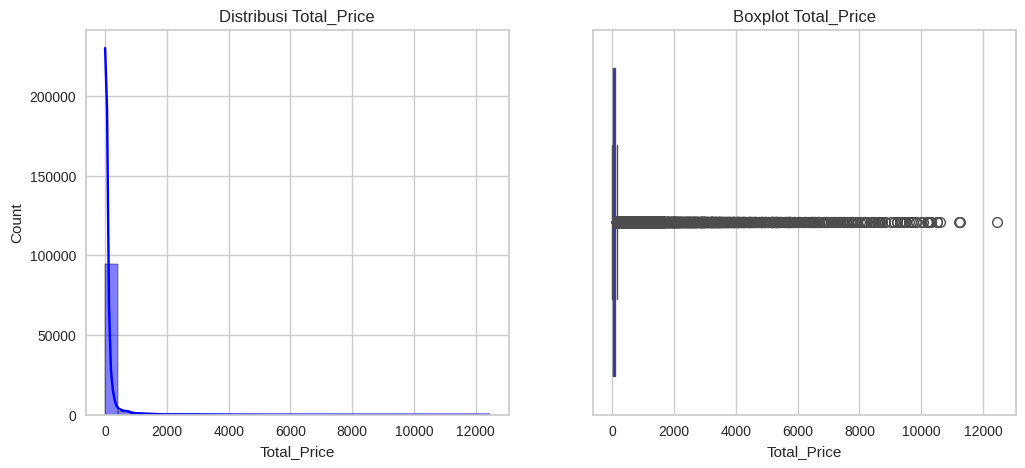

In [9]:
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Boxplot {col}')

    plt.show()

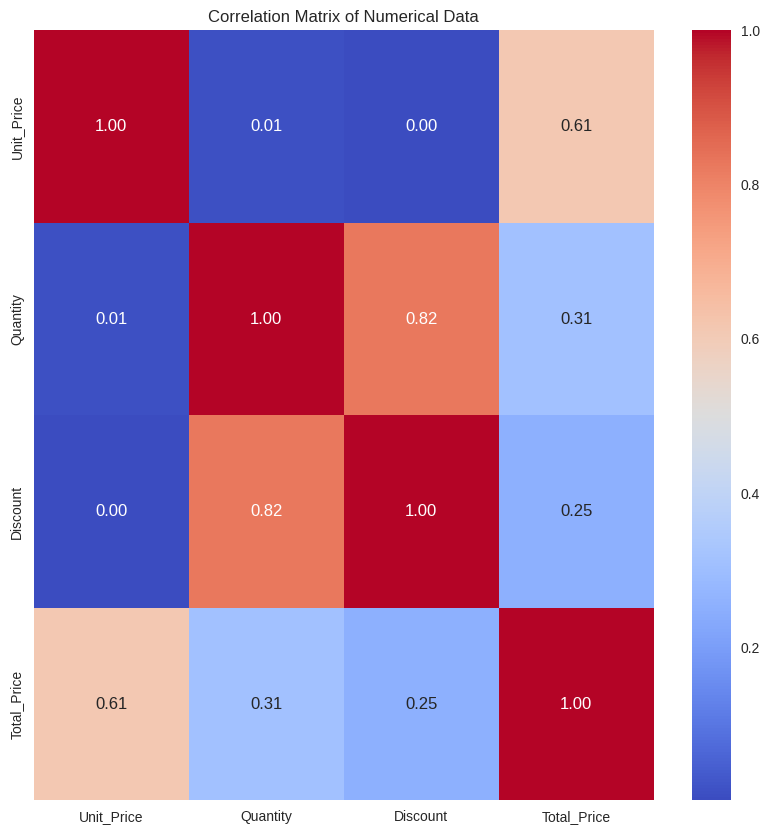

In [10]:
plt.figure(figsize=(10, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Data')
plt.show()

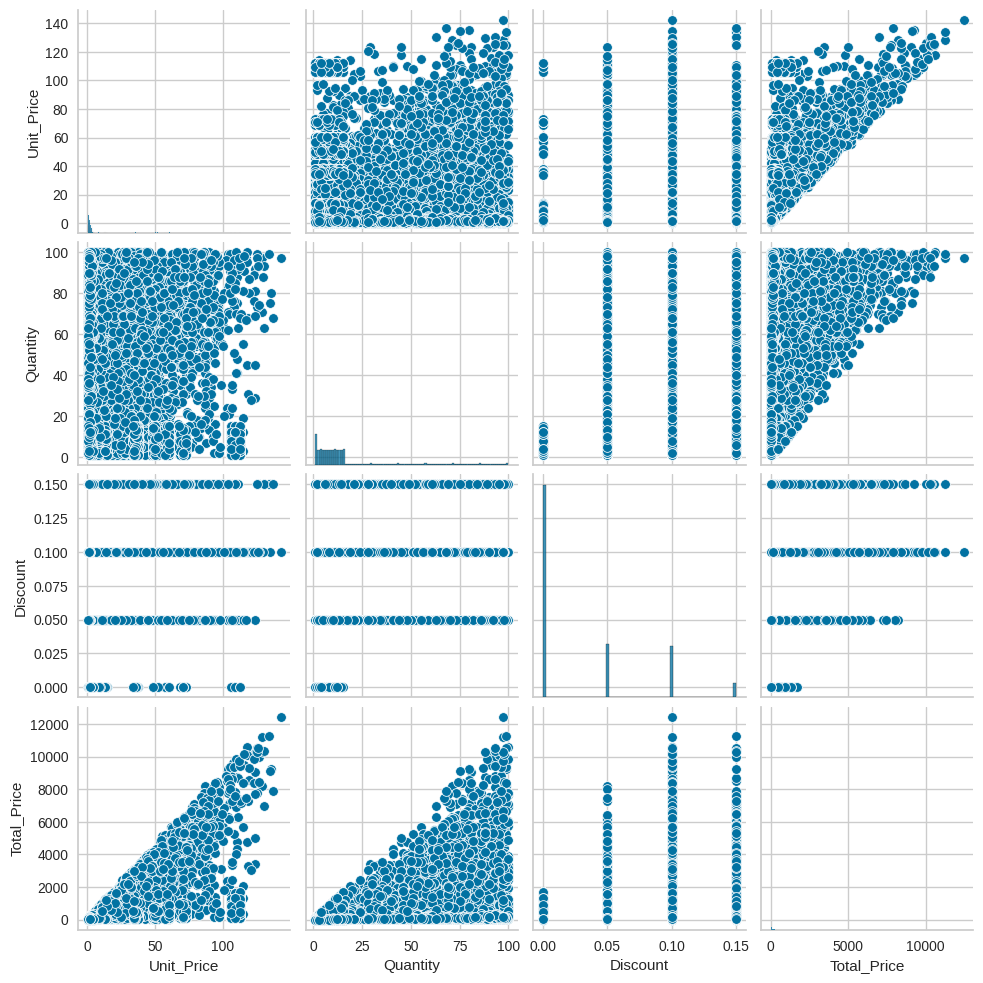

In [11]:
sns.pairplot(df[numeric_columns])
plt.show()

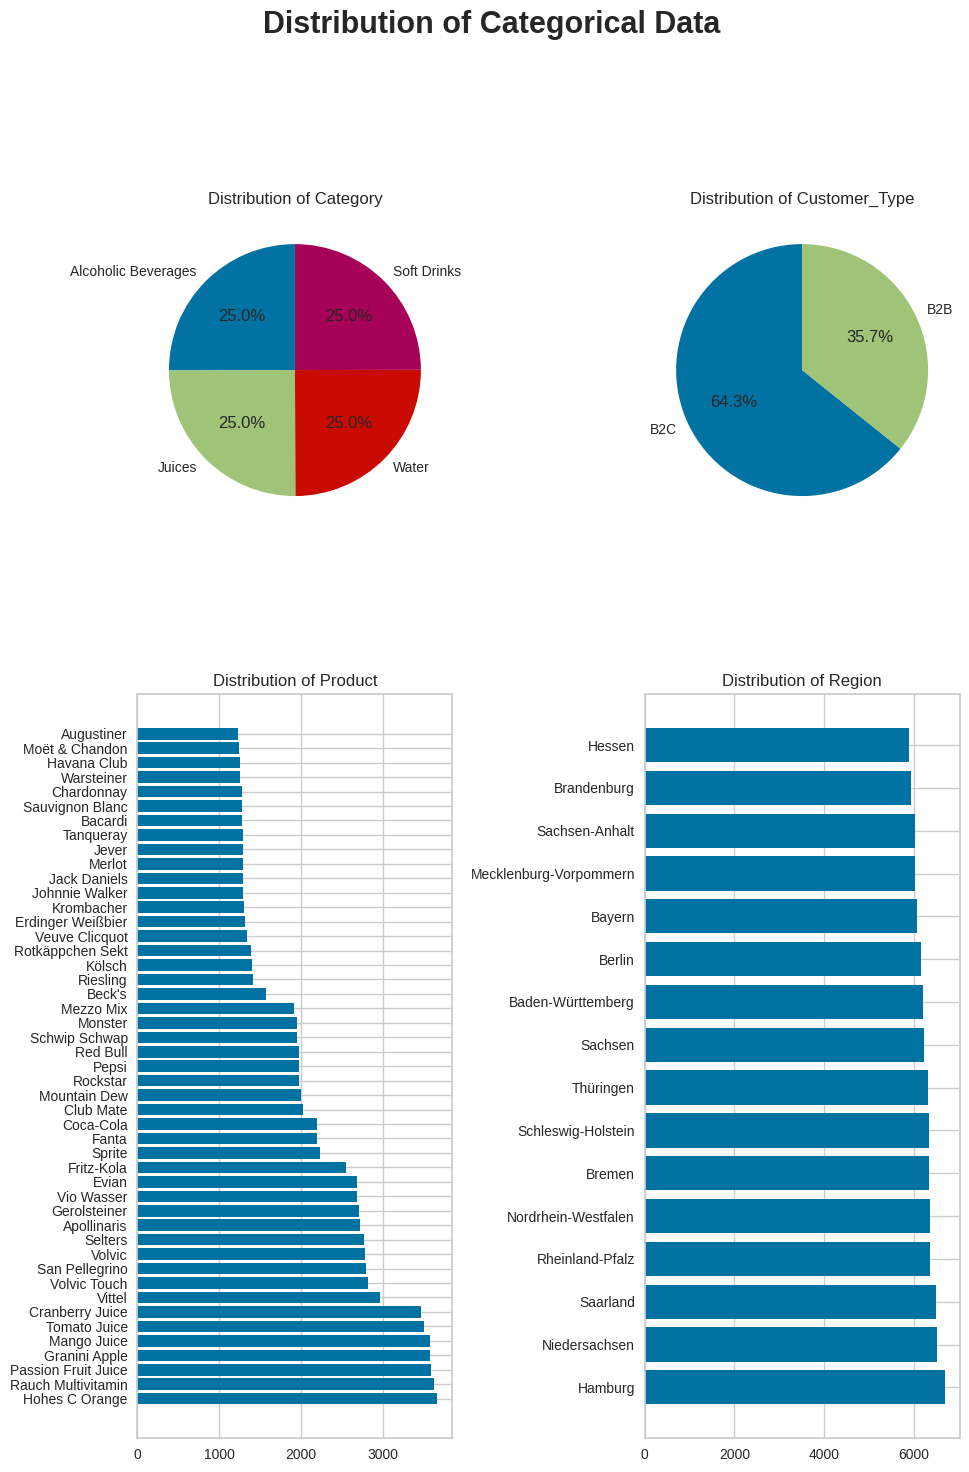

In [12]:
categorical_columns = ['Category','Customer_Type','Product','Region']

fig, axes = plt.subplots(2, 2, figsize=(10, 15))

category_count = df['Category'].value_counts()
axes[0,0].pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Category')

customer_type_count = df['Customer_Type'].value_counts()
axes[0,1].pie(customer_type_count, labels=customer_type_count.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribution of Customer_Type')

product_count = df['Product'].value_counts()
axes[1,0].barh(product_count.index, product_count.values)
axes[1,0].set_title('Distribution of Product')

region_count = df['Region'].value_counts()
axes[1,1].barh(region_count.index, region_count.values)
axes[1,1].set_title('Distribution of Region')

plt.tight_layout()
plt.suptitle("Distribution of Categorical Data", fontsize=22, fontweight='bold')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [13]:
# Cek missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


In [14]:
df = df.dropna()

In [16]:
print("\nJumlah Duplikat:", df.duplicated().sum())
df = df.drop_duplicates()


Jumlah Duplikat: 0


In [17]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [18]:
df_normalized = df.copy()
df_normalized[['Quantity']] = min_max_scaler.fit_transform(df_normalized[['Quantity']])
df_normalized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD942133,CUS9219,B2B,Chardonnay,Alcoholic Beverages,10.72,0.727273,0.05,743.43,Thüringen,2022-12-26
1,ORD917842,CUS4432,B2C,Veuve Clicquot,Alcoholic Beverages,112.46,0.141414,0.00,1686.90,Rheinland-Pfalz,2023-01-19
2,ORD338798,CUS165,B2C,Rauch Multivitamin,Juices,2.45,0.131313,0.00,34.30,Sachsen,2023-08-15
3,ORD746857,CUS6896,B2B,Vio Wasser,Water,1.88,0.939394,0.10,159.05,Sachsen,2022-10-04
4,ORD986320,CUS8013,B2C,Vio Wasser,Water,1.66,0.121212,0.00,21.58,Bremen,2022-06-02


In [19]:
df_standardized = df_normalized.copy()
df_standardized[['Total_Price', 'Unit_Price']] = standard_scaler.fit_transform(df_standardized[['Total_Price', 'Unit_Price']])
df_standardized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD942133,CUS9219,B2B,Chardonnay,Alcoholic Beverages,0.331617,0.727273,0.05,1.236990,Thüringen,2022-12-26
1,ORD917842,CUS4432,B2C,Veuve Clicquot,Alcoholic Beverages,7.236477,0.141414,0.00,3.137194,Rheinland-Pfalz,2023-01-19
2,ORD338798,CUS165,B2C,Rauch Multivitamin,Juices,-0.229649,0.131313,0.00,-0.191240,Sachsen,2023-08-15
3,ORD746857,CUS6896,B2B,Vio Wasser,Water,-0.268334,0.939394,0.10,0.060014,Sachsen,2022-10-04
4,ORD986320,CUS8013,B2C,Vio Wasser,Water,-0.283265,0.121212,0.00,-0.216858,Bremen,2022-06-02


In [20]:
Q1 = df_standardized[numeric_columns].quantile(0.25)
Q3 = df_standardized[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

In [21]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

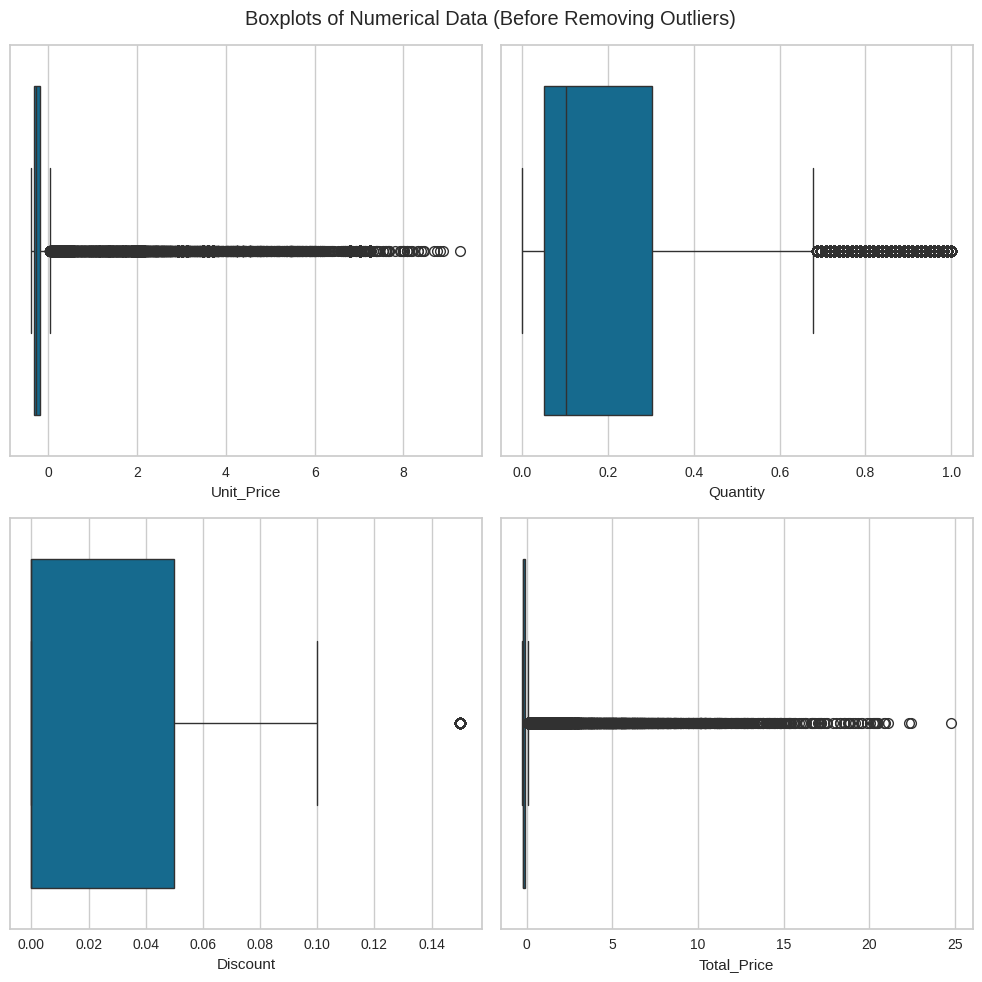

Jumlah data sebelum menghapus outlier: 100000


In [22]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df_standardized[col], ax=axes[i // 2, i % 2])

plt.suptitle("Boxplots of Numerical Data (Before Removing Outliers)")
plt.tight_layout()
plt.show()

print("Jumlah data sebelum menghapus outlier:", df_standardized.shape[0])

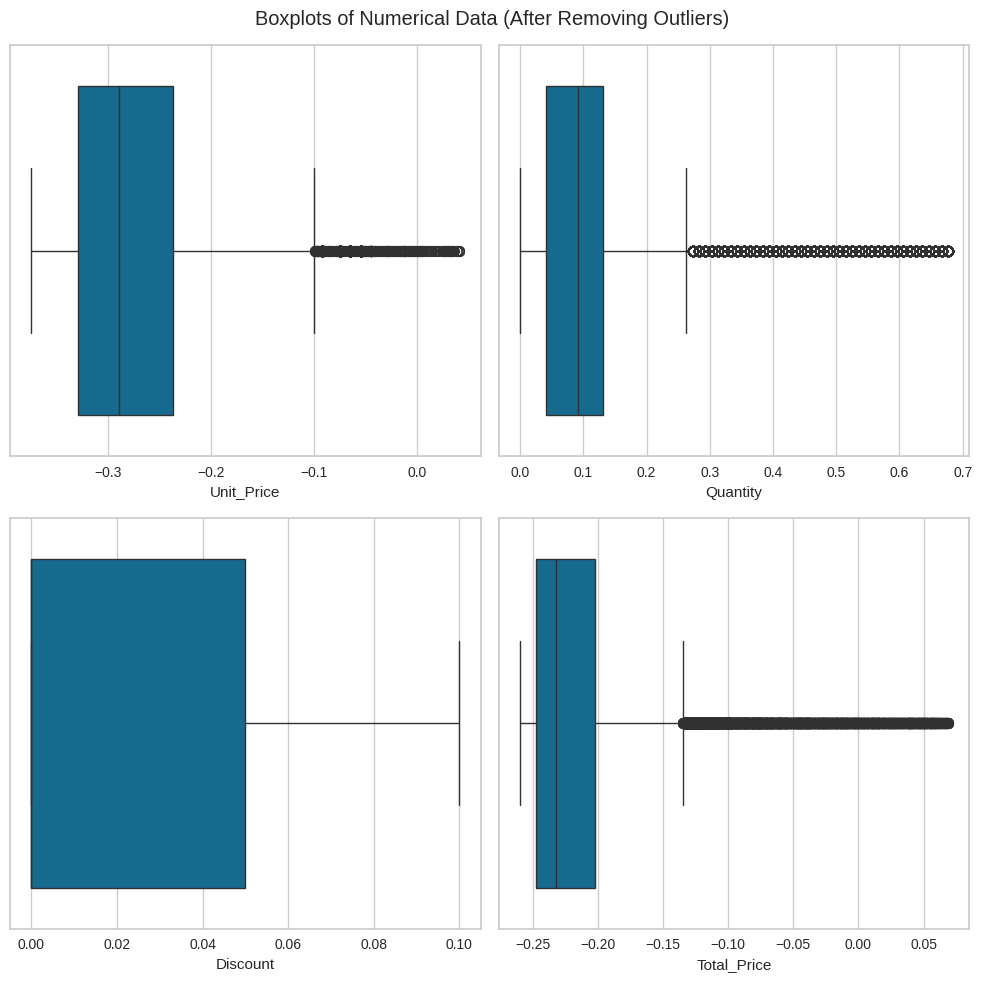

Jumlah data setelah menghapus outlier: 75880


In [23]:
mask = ~((df_standardized[numeric_columns] < lower_bound) | (df_standardized[numeric_columns] > upper_bound)).any(axis=1)
df_cleaned = df_standardized[mask]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df_cleaned[col], ax=axes[i // 2, i % 2])

plt.suptitle("Boxplots of Numerical Data (After Removing Outliers)")
plt.tight_layout()
plt.show()

print("Jumlah data setelah menghapus outlier:", df_cleaned.shape[0])

In [24]:
label_encoder = LabelEncoder()
df_labeled = df_cleaned.copy()

df_labeled[['Category', 'Region', 'Product']] = df_cleaned[['Category', 'Region', 'Product']].apply(label_encoder.fit_transform)
df_encoded = pd.get_dummies(df_labeled, columns=['Customer_Type'])

df_encoded.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
2,ORD338798,CUS165,24,1,-0.229649,0.131313,0.00,-0.191240,12,2023-08-15,False,True
4,ORD986320,CUS8013,35,3,-0.283265,0.121212,0.00,-0.216858,4,2022-06-02,False,True
5,ORD1602269,CUS7200,37,3,-0.358598,0.070707,0.00,-0.251460,12,2021-08-31,False,True
7,ORD240292,CUS8625,23,2,-0.294802,0.111111,0.00,-0.224310,13,2021-03-11,False,True
8,ORD276567,CUS2508,9,2,-0.345703,0.030303,0.05,-0.254662,11,2023-12-20,True,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [25]:
features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Customer_Type_B2B', 'Customer_Type_B2C']

X = df_encoded[features]

X

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C
2,-0.229649,0.131313,0.00,-0.191240,False,True
4,-0.283265,0.121212,0.00,-0.216858,False,True
5,-0.358598,0.070707,0.00,-0.251460,False,True
7,-0.294802,0.111111,0.00,-0.224310,False,True
8,-0.345703,0.030303,0.05,-0.254662,True,False
...,...,...,...,...,...,...
99994,-0.283265,0.020202,0.00,-0.250292,False,True
99995,-0.289373,0.646465,0.05,-0.065059,True,False
99996,-0.352490,0.626263,0.05,-0.183183,True,False
99998,-0.273763,0.101010,0.00,-0.220443,False,True


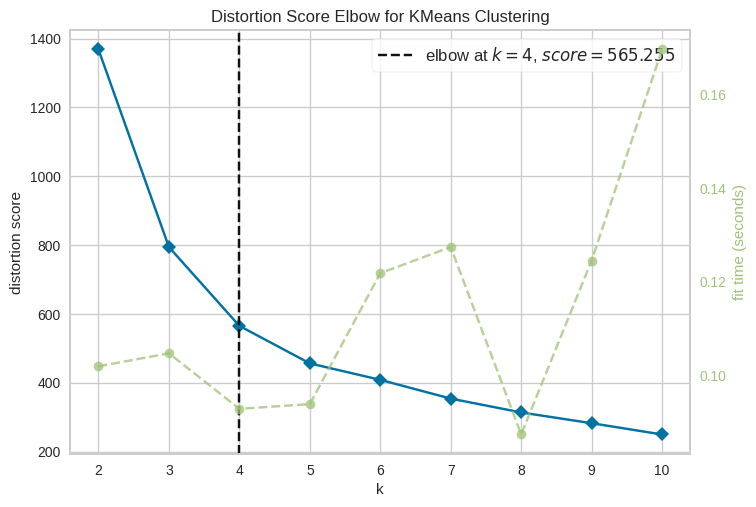

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2, 11))

visualizer.fit(X)

visualizer.show()

In [27]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

In [28]:
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=np.int64(4), random_state=69)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [29]:
sil_score = silhouette_score(X_pca, kmeans.labels_)

print(f'Silhouette Score untuk K={optimal_k}: {sil_score}')

Silhouette Score untuk K=4: 0.865858080349701


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

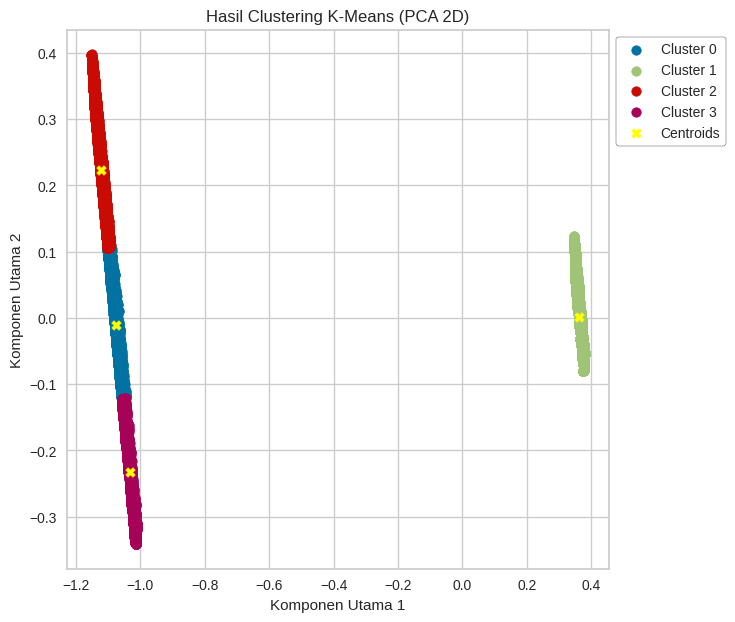

In [31]:
plt.figure(figsize=(7, 7))

for cluster in range(4):
    plt.scatter(X_pca[kmeans.labels_ == cluster, 0], X_pca[kmeans.labels_ == cluster, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', marker='X', label='Centroids')

plt.title('Hasil Clustering K-Means (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [32]:
df_labeled = df_cleaned.copy()
df_labeled['Cluster'] = kmeans.labels_
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
2,ORD338798,CUS165,B2C,Rauch Multivitamin,Juices,-0.229649,0.131313,0.00,-0.191240,Sachsen,2023-08-15,1
4,ORD986320,CUS8013,B2C,Vio Wasser,Water,-0.283265,0.121212,0.00,-0.216858,Bremen,2022-06-02,1
5,ORD1602269,CUS7200,B2C,Volvic,Water,-0.358598,0.070707,0.00,-0.251460,Sachsen,2021-08-31,1
7,ORD240292,CUS8625,B2C,Pepsi,Soft Drinks,-0.294802,0.111111,0.00,-0.224310,Sachsen-Anhalt,2021-03-11,1
8,ORD276567,CUS2508,B2B,Fanta,Soft Drinks,-0.345703,0.030303,0.05,-0.254662,Saarland,2023-12-20,3


In [33]:
df_labeled[['Quantity']] = min_max_scaler.inverse_transform(df_labeled[['Quantity']])
df_labeled[['Total_Price', 'Unit_Price']] = standard_scaler.inverse_transform(df_labeled[['Total_Price', 'Unit_Price']])
df_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
2,ORD338798,CUS165,B2C,Rauch Multivitamin,Juices,2.45,14.0,0.00,34.30,Sachsen,2023-08-15,1
4,ORD986320,CUS8013,B2C,Vio Wasser,Water,1.66,13.0,0.00,21.58,Bremen,2022-06-02,1
5,ORD1602269,CUS7200,B2C,Volvic,Water,0.55,8.0,0.00,4.40,Sachsen,2021-08-31,1
7,ORD240292,CUS8625,B2C,Pepsi,Soft Drinks,1.49,12.0,0.00,17.88,Sachsen-Anhalt,2021-03-11,1
8,ORD276567,CUS2508,B2B,Fanta,Soft Drinks,0.74,4.0,0.05,2.81,Saarland,2023-12-20,3


In [34]:
jumlah_per_klaster = df_labeled['Cluster'].value_counts()
print(jumlah_per_klaster, '\n')

Cluster
1    56754
0     6484
3     6350
2     6292
Name: count, dtype: int64 



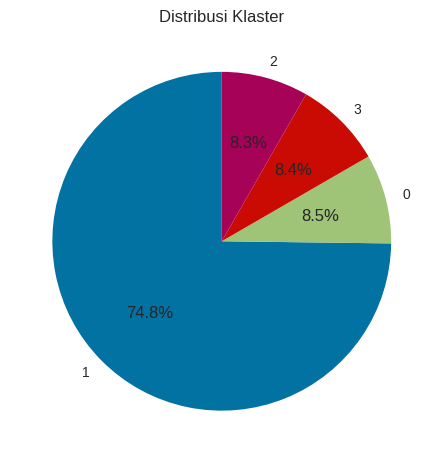

In [35]:
plt.pie(jumlah_per_klaster, labels=jumlah_per_klaster.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Klaster')
plt.show()

In [36]:
mean_values = df_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()
median_values = df_labeled.select_dtypes(include=['number']).groupby('Cluster').median()
mode_values = df_labeled.select_dtypes(include=['number']).groupby('Cluster').agg(lambda x: x.mode().iloc[0])

In [37]:
print("Mean Values:\n", mean_values, '\n')
print("Median Values:\n", median_values, '\n')
print("Mode Values:\n", mode_values, '\n')

Mean Values:
          Unit_Price   Quantity  Discount  Total_Price
Cluster                                              
0          1.595996  32.656693  0.065824    46.776174
1          1.852574   7.989129  0.000000    14.818032
2          1.653911  55.065957  0.077948    82.343576
3          1.521175  11.106929  0.059102    15.100939 

Median Values:
          Unit_Price  Quantity  Discount  Total_Price
Cluster                                             
0             1.290      32.0      0.05        40.38
1             1.610       8.0      0.00        11.16
2             1.500      55.0      0.10        76.03
3             1.205      11.0      0.05        11.29 

Mode Values:
          Unit_Price  Quantity  Discount  Total_Price
Cluster                                             
0              0.61      28.0      0.05        27.36
1              0.99      11.0      0.00        12.48
2              1.18      50.0      0.10        75.24
3              0.74       8.0      0.05      

In [38]:
customer_type_and_cluster_counts = df_labeled.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)

In [39]:
print(customer_type_and_cluster_counts, '\n')

Customer_Type   B2B    B2C
Cluster                   
0              6484      0
1                 0  56754
2              6292      0
3              6350      0 



<Figure size 700x700 with 0 Axes>

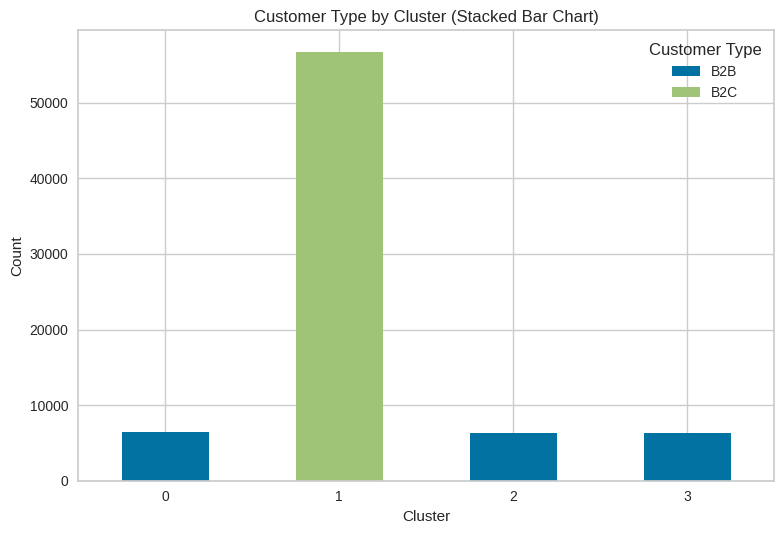

In [40]:
plt.figure(figsize=(7, 7))
customer_type_and_cluster_counts.plot(kind='bar', stacked=True)
plt.title('Customer Type by Cluster (Stacked Bar Chart)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

# Cluster 0 :
Pelanggan Retail (B2C - Business to Consumer)
1. Jumlah pelanggan dalam klaster ini mencapai 56.636, menjadikannya yang terbesar dibandingkan klaster lainnya. Seluruh pelanggan berasal dari segmen B2C, yaitu konsumen individu.
2. Rata-rata harga per unit produk mencapai 1,84, yang merupakan yang tertinggi di antara semua klaster, menandakan bahwa pelanggan ini membayar lebih mahal per produk. Namun, rata-rata jumlah pembelian hanya sekitar 7,99 unit, mencerminkan pola pembelian dalam skala kecil. Tidak ada diskon yang diberikan kepada kelompok ini, kemungkinan karena nilai pembeliannya yang rendah. Total nilai transaksi juga tergolong kecil, yaitu 14,75.

Analisis Klaster:
Klaster ini menggambarkan perilaku pelanggan individu yang cenderung membeli dalam jumlah sedikit, tanpa adanya diskon, dan membayar harga lebih tinggi per unit. Mereka kemungkinan merupakan pembeli eceran yang berbelanja berdasarkan kebutuhan sesaat, bukan pembelian dalam jumlah besar yang direncanakan.

Strategi Potensial:
Untuk mendorong peningkatan pembelian, dapat diterapkan program loyalitas atau penawaran bundling. Selain itu, pemberian diskon atau promosi tertentu bisa mendorong pelanggan ini untuk berbelanja dalam jumlah lebih besar.

# Cluster 1 :
Pelanggan Bisnis Skala Menengah (B2B)
1. Klaster ini mencakup 6.589 pelanggan, jumlahnya lebih sedikit dibandingkan Cluster 0, namun tetap signifikan. Seluruh pelanggan berasal dari segmen bisnis (B2B).
2. Harga satuan produk rata-rata berada di angka 1,61 — lebih rendah dibandingkan klaster retail — karena mereka membeli dalam volume lebih besar. Jumlah pembelian rata-rata mencapai 34,07 unit, menunjukkan transaksi dalam skala sedang. Diskon rata-rata yang diterima sebesar 6,67%, lebih besar dari Cluster 2 namun masih di bawah Cluster 3. Total nilai transaksi pun relatif besar, yakni 49,37.

Analisis Klaster:
Pelanggan dalam klaster ini kemungkinan merupakan bisnis berskala kecil hingga menengah, seperti toko eceran atau reseller, yang melakukan pembelian rutin dalam jumlah sedang. Mereka telah memperoleh diskon sebagai insentif atas volume pembelian mereka.

Strategi Potensial:
Strategi yang bisa diterapkan adalah menawarkan diskon tambahan apabila mereka meningkatkan jumlah pembelian. Selain itu, menyediakan opsi pembayaran bertahap atau fasilitas kredit dapat membantu mereka membeli dalam jumlah lebih besar tanpa tekanan keuangan langsung.

# Cluster 2 :
Pelanggan Bisnis Skala Kecil (B2B)
1. Klaster ini mencakup 6.929 pelanggan, sedikit lebih banyak dibandingkan Cluster 1. Seluruh pelanggan merupakan entitas bisnis.
2. Rata-rata harga per unit adalah 1,53 — terendah di antara klaster lain kemungkinan karena jenis produk yang dibeli lebih ekonomis. Rata-rata jumlah pembelian adalah 11,90 unit, lebih banyak dari Cluster 0 (ritel), namun masih di bawah Cluster 1. Diskon yang diterima sebesar 5,97%, relatif kecil dibandingkan klaster B2B lainnya. Total transaksi juga masih tergolong rendah, yakni sebesar 16,38.

Analisis Klaster:
Klaster ini mewakili pelaku bisnis berskala kecil yang melakukan pembelian dalam jumlah terbatas, mungkin hanya untuk memenuhi kebutuhan stok jangka pendek. Mereka telah mendapatkan potongan harga, namun tidak sebesar klaster dengan volume pembelian lebih tinggi.

Strategi Potensial:
Agar mereka meningkatkan jumlah pembelian, dapat ditawarkan insentif khusus seperti bonus atau promo untuk pembelian dalam jumlah lebih besar. Alternatif lainnya adalah memberikan harga spesial untuk produk tertentu guna mendorong pembelian yang lebih tinggi.

# Cluster 3
Pelanggan B2B Skala Besar
1. Dengan jumlah 5.794 pelanggan, klaster ini merupakan yang paling kecil secara jumlah pelanggan, namun mencatat total transaksi tertinggi. Semua pelanggan berasal dari kategori bisnis (B2B).
2. Harga rata-rata per unit sebesar 1,63 — hampir setara dengan Cluster 1 yang menandakan bahwa harga tetap dijaga kompetitif meskipun volume pembelian tinggi. Jumlah rata-rata pembelian mencapai 55,89 unit, tertinggi dibanding klaster lainnya, mencerminkan aktivitas pembelian dalam skala sangat besar. Diskon rata-rata yang diberikan mencapai 7,87%, tertinggi di antara seluruh klaster, sebagai bentuk insentif atas besarnya volume pembelian. Total nilai transaksi mencapai 82,23 — paling besar dibanding klaster lain.

Analisis Klaster:
Pelanggan dalam klaster ini kemungkinan adalah distributor besar atau perusahaan yang secara rutin membeli dalam jumlah besar untuk keperluan bisnis atau penjualan kembali. Diskon yang tinggi menjadi daya tarik utama bagi kelompok ini, sebagai kompensasi dari skala pembelian mereka yang besar.

Strategi Potensial:
Untuk mempertahankan loyalitas mereka, perusahaan dapat menawarkan keuntungan tambahan seperti diskon eksklusif, pengiriman gratis, atau akses prioritas terhadap produk tertentu. Menjalin relasi bisnis jangka panjang juga penting agar mereka tetap menjadi pelanggan setia.







# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [41]:
df_labeled.to_csv('Dataset_inisiasi.csv', index=False)
print("Dataset berhasil disimpan sebagai 'Dataset_inisiasi.csv'.")

Dataset berhasil disimpan sebagai 'Dataset_inisiasi.csv'.
